In [35]:
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset (1).csv


In [40]:
# Step 1: Collecting data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [41]:
data = pd.read_csv('Titanic-Dataset.csv')
print(data.shape)
print("Number of passengers: " +str(len(data.index)))
data.head(10)

(891, 12)
Number of passengers: 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<Axes: xlabel='Survived', ylabel='count'>

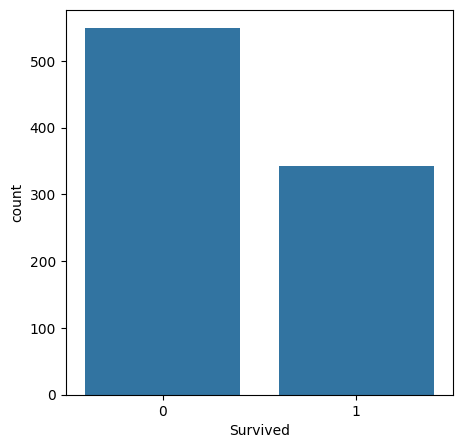

In [42]:
#Step 2: Analyzing data
plt.rcParams['figure.figsize'] = (5.0, 5.0)
sns.countplot(x="Survived", data = data)

<Axes: xlabel='Survived', ylabel='count'>

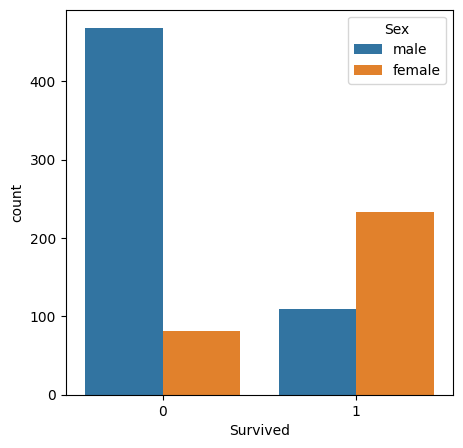

In [ ]:
plt.rcParams['figure.figsize'] = (5.0, 5.0)
sns.countplot(x = "Survived", hue = "Sex", data = data)

<Axes: xlabel='Survived', ylabel='count'>

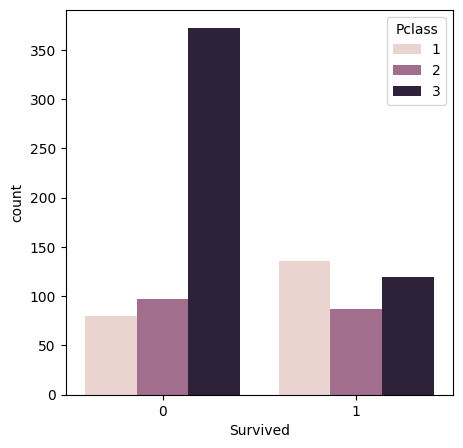

In [43]:
plt.rcParams['figure.figsize'] = (5.0, 5.0)
sns.countplot(x="Survived", hue = "Pclass", data = data)

<Axes: ylabel='Frequency'>

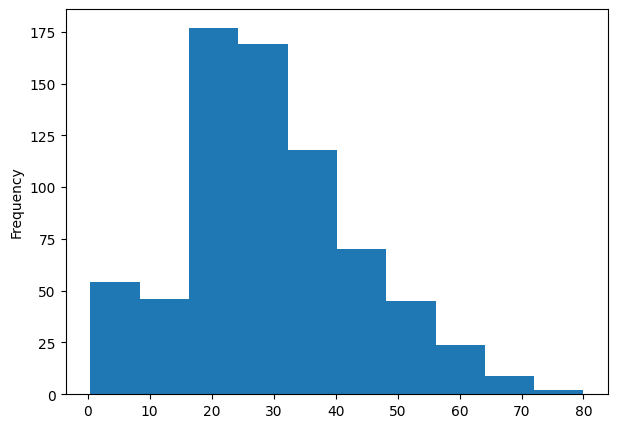

In [44]:
plt.rcParams['figure.figsize'] = (5.0, 5.0)
data["Age"].plot.hist(figsize = ((7,5)))

<Axes: ylabel='Frequency'>

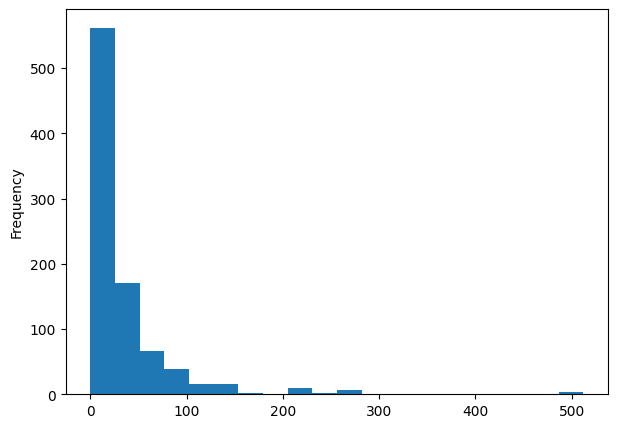

In [45]:
data["Fare"].plot.hist(bins = 20, figsize = ((7,5)))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

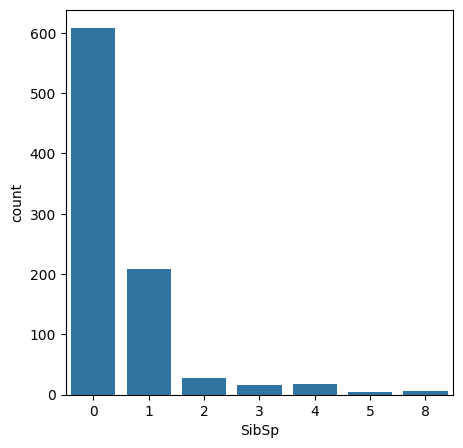

In [ ]:
plt.rcParams['figure.figsize'] = (5.0, 5.0)
sns.countplot(x = "SibSp", data = data)

<Axes: >

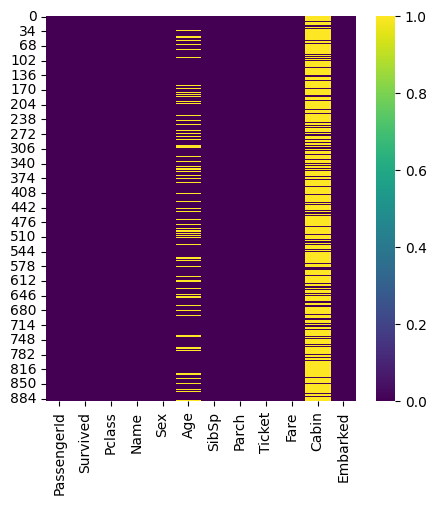

In [ ]:
sns.heatmap(data.isnull(), cmap = "viridis")

<Axes: xlabel='Pclass', ylabel='Age'>

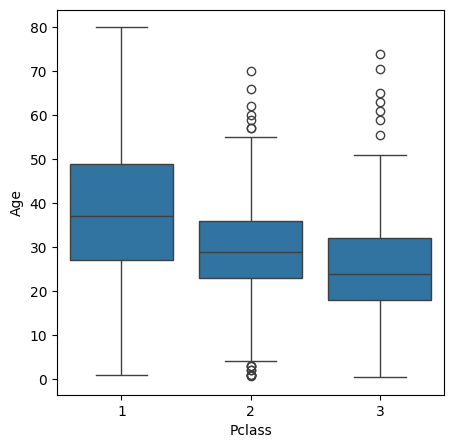

In [ ]:
sns.boxplot(x = "Pclass", y ="Age", data = data)

In [ ]:
# Data preprocessing
data.dropna(inplace=True)
print("Null values after dropping:\n", data.isnull().sum())

Null values after dropping:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


<Axes: >

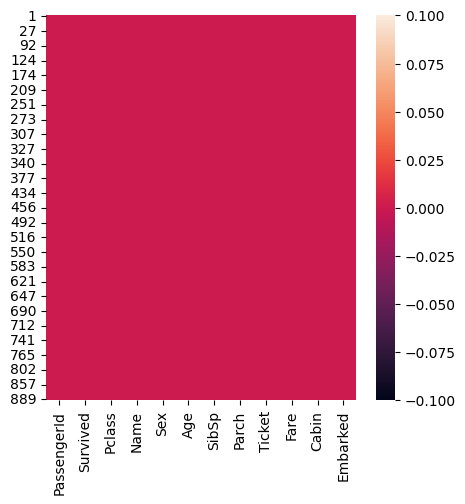

In [ ]:
sns.heatmap(data.isnull())
#cabin is removed and all the null values from age and embarked column have also been cleansed

In [38]:
# # Encoding categorical variables
# sex = pd.get_dummies(data['Sex'], drop_first=True)
# emb = pd.get_dummies(data['Embarked'], drop_first=True)
# p_cla = pd.get_dummies(data['Pclass'], drop_first=True)

In [53]:
le = LabelEncoder()
data['Sex_encoded'] = le.fit_transform(data['Sex'])
data['Embarked_encoded'] = le.fit_transform(data['Embarked'].fillna(data['Embarked'].mode()[0]))

# One-hot encoding for Pclass
p_cla = pd.get_dummies(data['Pclass'], drop_first=True, prefix='Pclass')

In [ ]:
# data = pd.concat([data, sex, emb, p_cla], axis = 1)

In [58]:
features = ['Age', 'Fare', 'Sex_encoded', 'Embarked_encoded', 'Pclass_2', 'Pclass_3']
X = data[features].values  # Convert to NumPy array to remove column names
y = data["Survived"]

In [54]:
# data = pd.concat([data, p_cla], axis=1)

In [55]:
# features = ['Age', 'Fare', 'Sex_encoded', 'Embarked_encoded', 'Pclass_2', 'Pclass_3']
# X = data[features]
# y = data["Survived"]

In [ ]:
# data.drop(['Sex', 'Embarked', 'PassengerId', 'Name', 'Ticket', 'Pclass'], axis = 1, inplace = True)

In [ ]:
# X = data.drop("Survived", axis=1)
# y = data["Survived"]

In [56]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded,Embarked_encoded
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,2
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0,2
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0,2
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,1,2
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,1,2
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,1,2
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,0,0
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,1,0


In [60]:
#test_size 0.3 meaning 70% to train the model and 30% to test the model
X_train, X_test, y_test, y_train = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [61]:
# Train logistic regression
log = LogisticRegression(random_state=1)
log.fit(X_train, y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
log = LogisticRegression()

NameError: name 'LogisticRegression' is not defined

In [ ]:
log.fit(X_train, y_train)

NameError: name 'log' is not defined

In [ ]:
prediction = log.predict(X_test)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
from sklearn.metrics import classification_report